## Exercise 9: Logistic Regression

In [33]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

### Read all 4 parameters and get min and max values

In [34]:
X_sepal_length = iris["data"][:, :1]  # sepal length
X_sepal_width = iris["data"][:, 1:2]  # sepal width
X_petal_length = iris["data"][:, 2:3]  # sepal width
X_petal_width = iris["data"][:, 3:]  # sepal width
y = (iris["target"] == 2).astype(np.int)  # array of 1 if Iris-Virginica, else 0

# np.amin(X_sepal_length) # X_sepal_length min -> 4.3
# np.amax(X_sepal_length) # X_sepal_length max -> 7.9

# np.amin(X_sepal_width) # X_sepal_width min -> 2.0
# np.amax(X_sepal_width) # X_sepal_width max -> 4.4

# np.amin(X_petal_length) # X_petal_length min -> 1.0
# np.amax(X_petal_length) # X_petal_length max -> 6.9

# np.amin(X_petal_width) # X_petal_width -> 0.1
# np.amax(X_petal_width) # X_petal_width max -> 2.5

## Train the model

In [35]:
log_reg_sepal_length = LogisticRegression()
log_reg_sepal_width = LogisticRegression()
log_reg_petal_length = LogisticRegression()
log_reg_petal_width = LogisticRegression()

log_reg_sepal_length.fit(X_sepal_length, y)
log_reg_sepal_width.fit(X_sepal_width, y)
log_reg_petal_length.fit(X_petal_length, y)
log_reg_petal_width.fit(X_petal_width, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 1. Probability of sepal_length

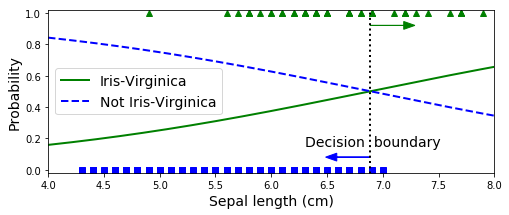

In [36]:
X_new = np.linspace(4, 8, 1000).reshape(-1, 1)
y_proba = log_reg_sepal_length.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X_sepal_length[y==0], y[y==0], "bs")
plt.plot(X_sepal_length[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Sepal length (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([4, 8, -0.02, 1.02])
plt.show()

In [37]:
decision_boundary

array([6.88688689])

In [38]:
log_reg_sepal_length.predict([[6.8], [6.9]])

array([0, 1])

**If the sepal length of the iris is below ~6.9 its hard to to tell if the flower is of type Iris-Virginica. If its below ~5 things are getting clearer. On the other hand if the value is above the boundary you can be pretty sure to deal with the Virginica type.**

### 2. Probability of sepal_width

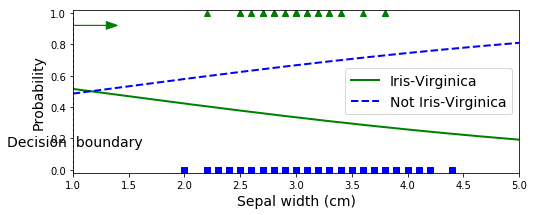

In [39]:
X_new = np.linspace(1, 5, 1000).reshape(-1, 1)
y_proba = log_reg_sepal_width.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X_sepal_width[y==0], y[y==0], "bs")
plt.plot(X_sepal_width[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Sepal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center right", fontsize=14)
plt.axis([1, 5, -0.02, 1.02])
plt.show()

In [40]:
decision_boundary

array([1.])

In [41]:
log_reg_sepal_width.predict([[1.6], [1.7]])

array([0, 0])

**The sepal width of the flowers doesnt help to distinguish them from each other.**

### 3. Probability of petal_length

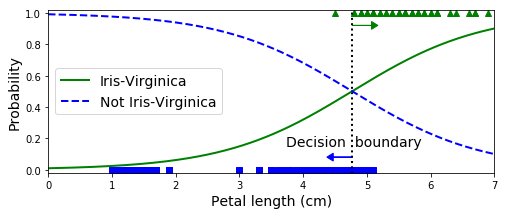

In [42]:
X_new = np.linspace(0, 7, 1000).reshape(-1, 1)
y_proba = log_reg_petal_length.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X_petal_length[y==0], y[y==0], "bs")
plt.plot(X_petal_length[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal length (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, -0.02, 1.02])
plt.show()

In [43]:
decision_boundary

array([4.77177177])

In [44]:
log_reg_petal_length.predict([[4.7], [4.8]])

array([0, 1])

**The petal length is a good candidate to distinguish the Iris-Virginica from the other types. If you got an value above 5 its almost certain that you have one flower of this type. Between 4.8 and 5.1 we got an overlap, but still.** 

### 4. Probability of petal_width

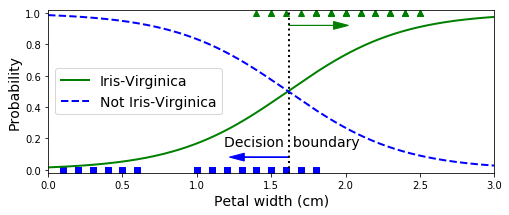

In [45]:
X_new  ==  np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg_petal_width.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X_petal_width[y==0], y[y==0], "bs")
plt.plot(X_petal_width[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [46]:
decision_boundary

array([1.61861862])

In [47]:
log_reg_sepal_length.predict([[6.8], [6.9]])

array([0, 1])

**The petal width, as seen in the example, is also overlapping a bit. If you got a value above 2 its almost certain to have a Virginica type.**

## Conclusion

The petal width and petal length are very goog values to determine the Iris-Virginica flower. The sepal width and sepal length are not suitable to distinguish this flower from the others as seen above.